# Notes on the relationship between erosion rate and facet angle

Building on Tucker et al. (2011), consider the cross-sectional profile of a facet with a uniform dip angle $\theta$. The dip angle of the fault is $\alpha$ and its slip rate is $V$. We want to know what is the implied *vertical* erosion rate for a given $\theta$, $\alpha$, and $V$.

Consider a location in the footwall at a horizontal distance $x$ from the fault trace. The time $t$ taken for rock to reach that location from the fault trace is equal to the distance, $x$, divided by the horizontal component of slip rate, $v_h$. This in turn implies that

$x = v_h t$.

By simple geometry, the horizontal component of slip rate is

$v_h = V \cos \alpha$.

If $\alpha = 60^\circ$, as we'll generally assume here, then $v_h = V / 2$.

We can imagine a triangle formed by the cumulative fault slip $Vt$ (the hypotenuse), the horizontal component $v_h = V\cos\alpha$, and the vertical component $v_v = V\sin\alpha$. Thus, the three sides of the triangle are $Vt$ (hypotenuse), $Vt\cos\alpha$ (base), and $Vt\sin\alpha$ (height). If $\alpha=60^\circ$, the sides of the triangle are $Vt$, $Vt/2$, and $\sqrt{3}Vt/2$, respectively.

Now consider the case when the facet dip is less than that of the fault dip. This implies that at horizontal position $x = v_h t$, there is an uneroded vertical column of rock of height $H$, where $\tan\theta = H/x$, and therefore

$H = x\tan\theta = v_h t \frac{\sin\theta}{\cos\theta}$

$=V t \frac{\cos\alpha\sin\theta}{\cos\theta}$.

As a check on this math, note that if $\theta = 0$, then $H=0$ (the surface is flat), whereas if $\theta = \alpha$, then we simply have the height of original (uneroded) triangle $Vt\sin\alpha$.

The cumulative erosion depth $h_e$ is the difference between the total column height if there were no erosion, and the actual column height:

$h_e = Vt\sin\alpha - H = Vt\sin\alpha - Vt\frac{\cos\alpha\sin\theta}{\cos\theta}$

$= Vt \left( \sin\alpha - \frac{\cos\alpha\sin\theta}{\cos\theta} \right)$.

The cumulative vertical erosion $h_e$ at position $x$ is also equal to the vertical erosion rate $E_v$ times the elapsed time, $t$, which implies

$E_v = V \left( \sin\alpha - \frac{\cos\alpha\sin\theta}{\cos\theta} \right)$.

We can do a basic sanity check. If $\theta = \alpha$ then the erosion rate should be zero, as it is above (the quantity in parentheses is zero). If $\theta = 0$, then the vertical erosion rate should equal the vertical component of slip. And indeed because the right-hand term in parentheses is zero when $\theta=0$, we have $E_v = V\sin\alpha$, which is the vertical component of slip rate.

Below, we plot this relationship, and look at some example scenarios.

In [2]:
def normalized_ero_rate(theta, alpha=60.0):
    alphar = np.radians(alpha)
    thetar = np.radians(theta)
    return np.sin(alphar) - np.cos(alphar) * (np.sin(thetar)
                                              / np.cos(thetar))

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
alpha = 60.0
theta = np.arange(0, 61)
EvV = normalized_ero_rate(theta, alpha)

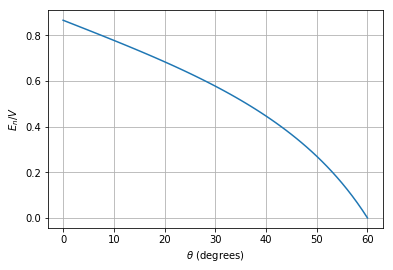

In [5]:
plt.plot(theta, EvV)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$E_n / V$')
plt.grid(True)

As expected, when the facet and fault dip are the same, the erosion rate is zero. When the facet angle is zero, meaning the surface is flat, erosion is vertical and its rate is equal to the vertical component of the slip rate. That vertical component is:

$v_v = V\sin\alpha$, which for $\alpha = 60^\circ$ again is $(\sqrt{3}/2) V$:

In [6]:
normalized_ero_rate(0.0)

0.8660254037844386

And for $\alpha = 30^\circ$:

In [7]:
normalized_ero_rate(30.0)

0.5773502691896257

Suppose, for example, the slip rate is $\sqrt{3}$ mm/yr. (Because of the grid geometry in the GrainFacet model, this is rate one gets using $\delta=1$ m and $\tau = 1,000$ yr.) Then for a flat slope, the vertical component of slip rate, $v_v$, and the vertical erosion rate, $E_v$, should be identical. Using the result above, we can calculate $v_v$ as:

In [9]:
V = np.sqrt(3)
V * np.sin(np.radians(60.0))

1.4999999999999998

And we can calculate $E_v$ as:

In [10]:
V * normalized_ero_rate(0.0, 60.0)

1.4999999999999998

Indeed we see they are the same, and the maximum erosion rate for this particular scenario is 1.5 mm/yr.

Consider next the example of a $30^\circ$ facet. Here the vertical erosion rate corresponding to the above slip rate would be:

In [11]:
V * normalized_ero_rate(30.0, 60.0)

0.9999999999999999

So, for a $30^\circ$ facet, the erosion rate is 2/3 of the theoretical maximum (i.e., what it would be for a flat "facet", where any uplifted material is immediately shaved off).

Just for completeness, we can look at the cases of $15^\circ$ ...

In [12]:
V * normalized_ero_rate(15.0, 60.0)

1.2679491924311224

... and $45^\circ$ ...

In [13]:
V * normalized_ero_rate(45.0, 60.0)

0.6339745962155612

## Slope-normal erosion rate

The vertical and slope-normal erosion rates are related by:

$\frac{E_n}{E_v} = \cos \theta$.

If we substitute this above, we find that:

$E_n = V \left( \sin\alpha\cos\theta- \cos\alpha\sin\theta \right)$.

We plot this below:

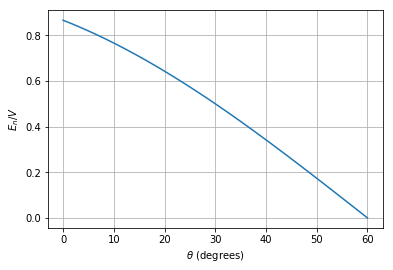

In [14]:
theta = np.arange(0, 61)
thetar = np.radians(theta)
alphar = np.radians(60.0)
EnV = np.sin(alphar) * np.cos(thetar) - np.cos(alphar) * np.sin(thetar)
plt.plot(theta, EnV)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$E_n / V$')
plt.grid(True)

For $\theta = \alpha = 60^\circ$, there is no erosion and the fault plane is unmodified. For $\theta = 0$, $E_n = E_v = \sqrt{3} / 2$.

Note that this differs from the result in Tucker et al. (2011), which reported the case of an arc-wise erosion vector.

We can simplify the above formula by using two trigonometric identities:

$\sin \alpha \cos \theta = (1/2) (\sin (a+b) + \sin (a-b) )$, and

$\cos \alpha \sin \theta = (1/2) (\sin (a+b) - \sin (a-b) )$.

Subtracting the two, as in the above equation, we get:

$E_n / V = \sin (\alpha - \theta )$.

Let's just verify it by plotting:



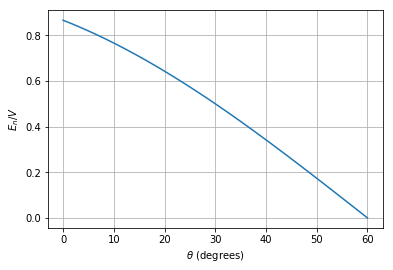

In [15]:
EnV = np.sin(alphar - thetar)
plt.plot(theta, EnV)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$E_n / V$')
plt.grid(True)

Voila: c'est la meme truc.

## How to calculate vertical erosion rate from a facet simulation

Suppose you have a snapshot from a GrainFacet simulation run that is in quasi-steady state with respect to tectonic forcing. How do you calculate the erosion rate? It is not as simple as it is for models with "vertical uplift" because mass can escape due to tectonic slip out the right side and possibly the top. However, we can use the basic theory above to calculate an effective erosion rate for each model column, and then average them together. Here's how it works.

### Horizontal position of a column

Let $c$ denote the column number in a run, starting from column zero at $x=0$. The spacing between columns is $\sqrt{3}/2$ cell widths. Thus, the $x$ coordinate, in cell widths, is:

$x(c) = \frac{\sqrt{3}}{2} c$.

### Height of a column

We can ask: what is the effective height of the column at that location? It's easy enough to count the number of nonzero cells in the column. We'll call this count $N(c)$. But how does that translate into height? First, let's assume that the land surface lies at the *center* of the top-most cell (of course, in plots, it *looks* like the surface is at the top of the filled cell, but this assumption is more consistent with how the fault is approximated in the model).

If we happen to be in an even-numbered column, the center of the bottom-most cell is at $y=0$, and so the center of the top cell is $N-1$. But if we happen to be in an odd-numbered column, the column is shifted up by half a cell width. So for these, the center of the top cell is $N-1/2$. We can generalize as follows to get the height, $H(c)$, of any arbitrary column:

$H(c) = N - \frac{1}{1 + (c \mod 2)}$

This expression sets $H = N - 1$ for even columns, and $H = N - 0.5$ for odd columns.

### Calculating erosion rate at a column

To calculate the erosion rate at a single column, we start with the expression for $E_v$ derived above:

$E_v / V = \sin\alpha - \frac{\cos\alpha\sin\theta}{\cos\theta}$.

Using $\alpha = 60^\circ$, and using numerical values of $\sin\alpha$ and $\cos\alpha$, this becomes:

$E_v / V = \frac{\sqrt{3}}{2} - \frac{1}{2} \frac{\sin\theta}{\cos\theta}$.

Noting that $\sin\theta / \cos\theta = \tan\theta = H / x$, we have:

$\frac{E_v}{V} = \frac{\sqrt{3}}{2} - \frac{H}{2x}$.

This is the formula we use to calculate vertical erosion rate, $E_v$, from column height, $H$, and horizontal position $x$.

The calculation is encapsulated in the following function:

In [34]:
def vert_ero_rate(c, N):
    """Normalized vertical erosion rate in column c with N solid cells.

    Parameters
    ----------
    c : int
        Column number
    N : int
        Number of solid cells in column
    """
    x = 0.5 * np.sqrt(3) * c
    if N <= 1:  # if only one cell, assume it's totally eroded
        H = 0.0
    else:
        H = N - 1.0 / (1.0 + (c % 2))
    return 0.5 * np.sqrt(3) - 0.5 * H / x

### Examples

Suppose you have only 1 cell in column 2. That's the minimum number of cells possible in the numerical model: the bottom-most cell is a boundary, and always contains rock. The erosion rate should equal the vertical component of slip rate, so $E_v/V$ should equal $\sin 60^\circ = \sqrt{3}/2 \approx 0.866$. Let's try it:

In [23]:
vert_ero_rate(2, 1)

0.8660254037844386

The result should be the same in odd-numbered columns, say column 7:

In [24]:
vert_ero_rate(7, 1)

0.8660254037844386

If we had a $60^\circ$ slope, columns 3 and 4 would have 5 and 7 solid cells, respectively, and the erosion rate should be zero:

In [25]:
vert_ero_rate(3, 5)

0.0

In [26]:
vert_ero_rate(4, 7)

-1.1102230246251565e-16

The latter result tells us there is a slight numerical inaccuracy: probably a subtraction-of-close-numbers error. To diagnose it, let's see how $H/x$ compares with $\sqrt{3}$:

In [28]:
c = 4
N = 7
H = N - 1.0 / (1.0 + (c % 2))
x = 0.5 * np.sqrt(3) * c
print('Square root of 3 is approxately: ' + str(np.sqrt(3)))
print('H is: ' + str(H))
print('x is: ' + str(x))
print('H / x is: ' + str(H/x))

Square root of 3 is approxately: 1.7320508075688772
H is: 6.0
x is: 3.4641016151377544
H / x is: 1.7320508075688774


We see that that there is a slight numerical error in $H/x$: it is off in the 16th decimal place (hence an error of order $10^{-16}$). This seems perfectly acceptable.

As a last example, consider columns 5 and 6 on a $30^\circ$ facet. The number of filled cells would be 3 and 4, respectively. From the analysis above, we expect a vertical erosion rate of $\sqrt{3}/3$, which is about:

In [29]:
np.sqrt(3.0)/3.0

0.5773502691896257

In [32]:
vert_ero_rate(5, 3)

0.5773502691896257

In [33]:
vert_ero_rate(6, 4)

0.5773502691896257

## Summary

To summarize, the method for calculating average vertical erosion rate in each column (from columns 2 to the right-most inner column) of a snapshop of a GrainFacet model run consists of the following steps:

(1) Calculate the position of the column: $x(c) = \sqrt{3} c / 2$.

(2) Calculate the height of the column: $H(N, c) = N - \frac{1}{1 + (c \mod 2)}$, if $N>1$, and $H = 0$ otherwise.

(3) Calculate the column's erosion rate: $E_v = \frac{\sqrt{3}\delta}{\tau} \left( \frac{\sqrt{3}}{2} - \frac{H}{2x} \right)$.

(Note that step 3 includes that $V = \sqrt{3}\delta / \tau$, where $\delta$ is cell width, $\tau$ is the slip interval, and $\sqrt{3}\delta$ is the slip distance.)

Once the individual columns have been calculated, their vertical erosion rates are averaged.